# Showcase Notebook for Usage Examples

In [14]:
import warnings
warnings.filterwarnings('ignore')

### Import Project and Cluster Methods

In [15]:
import data_generation_visual
import src.model_training.clusters as cl 
import pandas as pd

### Load Examples

In [16]:
import os
PROJECT_PATH = os.getcwd().replace("notebooks", "")
DATA_GEN_FOLDER_NAME = "Dec-20-2020"
DATASET_PATH = PROJECT_PATH + "data/" + DATA_GEN_FOLDER_NAME + "/"
OVERVIEW_DATASET_PATH = DATASET_PATH + "overview.csv"
overview_df = pd.read_csv(OVERVIEW_DATASET_PATH)
overview_df = overview_df[overview_df['do_data_augmentation'] == "no"]

In [17]:
overview_df.head()

,Unnamed: 0,Unnamed: 0.1,divide_by_country_population,do_smoothing,nr_days_for_avg,do_data_augmentation,percent_varianz,filename,kmedoids_6_filename,kmeans_6_filename,dbscan_6_filename,ts_kmeans_6_filename,ts_kshape_6_filename
0,0,0,no,no,3,no,0.05,0,KMedoids_no_cluster_6_0,KMeans_no_cluster_6_0,DBSCAN_no_cluster_6_0,TS_KMeans_no_cluster_6_0,TS_KShape_no_cluster_6_0
1,1,1,no,no,3,no,0.01,1,KMedoids_no_cluster_6_1,KMeans_no_cluster_6_1,DBSCAN_no_cluster_6_1,TS_KMeans_no_cluster_6_1,TS_KShape_no_cluster_6_1
2,4,4,no,no,7,no,0.05,4,KMedoids_no_cluster_6_4,KMeans_no_cluster_6_4,DBSCAN_no_cluster_6_4,TS_KMeans_no_cluster_6_4,TS_KShape_no_cluster_6_4
3,5,5,no,no,7,no,0.01,5,KMedoids_no_cluster_6_5,KMeans_no_cluster_6_5,DBSCAN_no_cluster_6_5,TS_KMeans_no_cluster_6_5,TS_KShape_no_cluster_6_5
4,8,8,no,no,14,no,0.05,8,KMedoids_no_cluster_6_8,KMeans_no_cluster_6_8,DBSCAN_no_cluster_6_8,TS_KMeans_no_cluster_6_8,TS_KShape_no_cluster_6_8


In [18]:
data = []
for f in overview_df['filename']:
    data.append((data_generation_visual.load_Examples_from_file(DATASET_PATH + str(f)), f))

In [19]:
from tqdm import tqdm
n_clusters = [10]
models = [cl.KMedoids, cl.KMeans,  cl.DBSCAN, cl.TS_KMeans, cl.TS_KShape]
for n in n_clusters:
    filenames = []
    for m in tqdm(models):
        model_names = []
        for ex,file in data:
            ex.add_padding()
            model = m(n_clusters, metric='euclidean').fit(ex)
            filename = f"{model.name}_no_cluster_{n_clusters}_{file}"
            model.save_model(filename)
            model_names.append(filename)
        filenames.append(model_names)
    overview_df[f'kmedoids_{n}_filename'] = filenames[0]
    overview_df[f'kmeans_{n}_filename'] = filenames[1]
    overview_df[f'dbscan_{n}_filename'] = filenames[2]
    overview_df[f'ts_kmeans_{n}_filename'] = filenames[3]
    overview_df[f'ts_kshape_{n}_filename'] = filenames[4]

In [21]:
overview_df.to_csv(OVERVIEW_DATASET_PATH)

In [27]:
import pickle
print(DATASET_PATH)
with open(DATASET_PATH + "model/KMeans_no_cluster_6_0", 'rb') as f:
     model = pickle.load(f)
model.plot_geo_cluster()

C:\Users\Lisa P-Punkt\Lab2020-21ClusteringCovidData\data/Dec-20-2020/


<module 'matplotlib.pyplot' from 'C:\\Users\\Lisa P-Punkt\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

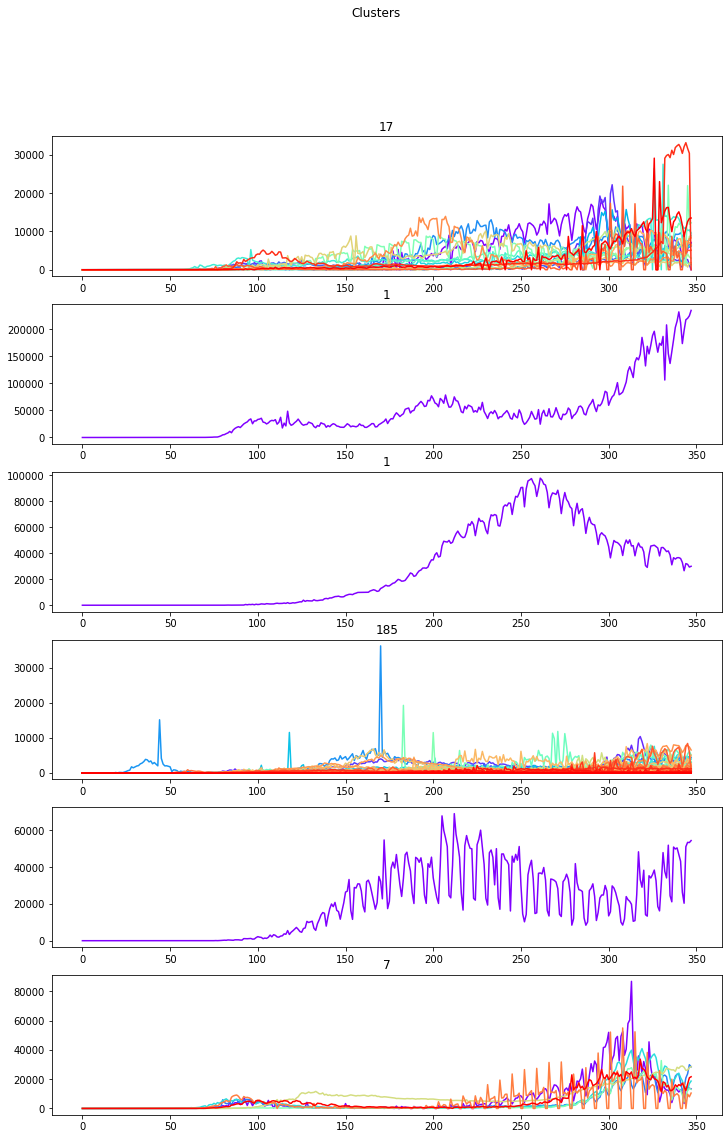

In [28]:
model.plot_cluster()

### Demonstration of Augmentation/Smoothing

In [47]:
germany = []
for d in data:
    germany.append(list(filter(lambda snippet: snippet.country_id=="DEU", d[0].train_data))[0])

Text(0, 0.5, 'Different methodologys on german time series')

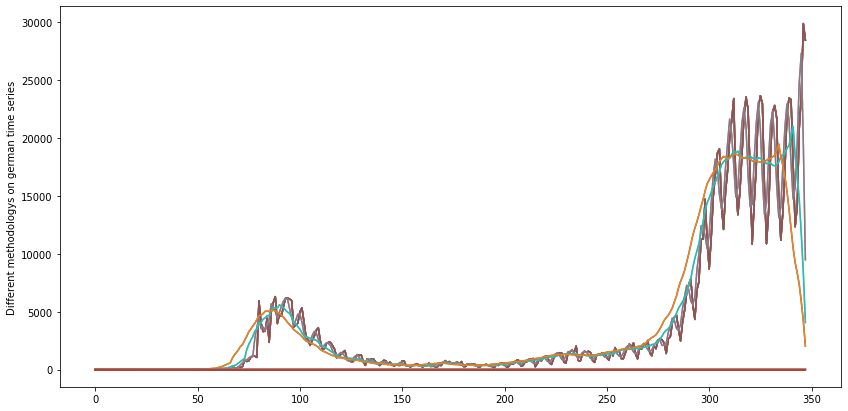

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
for g in germany:
    plt.plot(g.time_series)
plt.ylabel('Different methodologys on german time series')